In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
df = pandas.read_csv('../data/pv_sandia/pv_sandia_modules.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'Vintage', 'Area', 'Material', 'Cells_in_Series',
       'Parallel_Strings', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Aisc', 'Aimp',
       'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       'A', 'B', 'C4', 'C5', 'IXO', 'IXXO', 'C6', 'C7', 'Notes', 'name',
       'annual_energy_yield'],
      dtype='object')

In [4]:
df = df.dropna()
df

,Unnamed: 0,Vintage,Area,Material,Cells_in_Series,Parallel_Strings,Isco,Voco,Impo,Vmpo,...,B,C4,C5,IXO,IXXO,C6,C7,Notes,name,annual_energy_yield
0,0,2006,1.312,mc-Si,72,1,5.564,42.832,5.028,32.410,...,-0.11610,0.9974,0.0026,5.5400,3.5600,1.1730,-0.1730,Source: Sandia National Laboratories Updated 9...,Advent_Solar_AS160___2006_,192282.329768
1,1,2008,1.646,mc-Si,60,1,8.340,35.310,7.490,27.610,...,-0.07700,0.9720,0.0280,8.2500,5.2000,1.0670,-0.0670,Source: Sandia National Laboratories Updated 9...,Advent_Solar_Ventura_210___2008_,226684.270326
2,2,2009,1.646,mc-Si,60,1,8.490,35.920,7.740,27.920,...,-0.08700,0.9890,0.0120,8.4900,5.4500,1.1370,-0.1370,Source: Sandia National Laboratories Updated 9...,Advent_Solar_Ventura_215___2009_,250480.349084
3,3,2007 (E),1.280,c-Si,72,1,5.100,43.500,4.550,35.600,...,-0.07500,0.9950,0.0050,5.0400,3.1600,1.1500,-0.1500,Source: Sandia National Laboratories Updated 9...,Aleo_S03_160__2007__E__,186434.210499
4,4,2007 (E),1.280,c-Si,72,1,5.200,43.600,4.650,35.800,...,-0.07500,0.9950,0.0050,5.1400,3.2500,1.1500,-0.1500,Source: Sandia National Laboratories Updated 9...,Aleo_S03_165__2007__E__,191864.045162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,508,2008,1.700,mc-Si,60,1,8.163,36.871,7.388,28.633,...,-0.10120,0.9892,0.0108,8.0491,5.1339,1.1335,-0.1335,Source: Sandia National Laboratories Updated 9...,Yingli_Solar_YL220_Module___2008_,242287.899650
509,509,2008 (E),1.700,mc-Si,60,1,8.100,36.600,7.400,30.000,...,-0.10120,0.9892,0.0108,8.2900,5.1339,1.1335,-0.1335,Source: Sandia National Laboratories Updated 9...,Yingli_Solar_YL220_Module__2008__E__,255513.103641
510,510,2009,1.634,mc-Si,60,1,8.222,37.280,7.727,29.886,...,-0.09143,0.9950,0.0050,8.1509,5.5099,1.1325,-0.1325,Source: Sandia National Laboratories Updated 9...,Yingli_Solar_YL230_29b_Module___2009_,268803.884622
511,511,2009 (E),1.634,mc-Si,60,1,8.400,37.000,7.800,29.500,...,-0.09143,0.9950,0.0050,8.3100,5.5700,1.1325,-0.1325,Source: Sandia National Laboratories Updated 9...,Yingli_Solar_YL230_29b_Module__2009__E__,269351.229827


# Area to annual energy, no other features

0.8612160327229886
0.2828577879288358
1303116101.342616


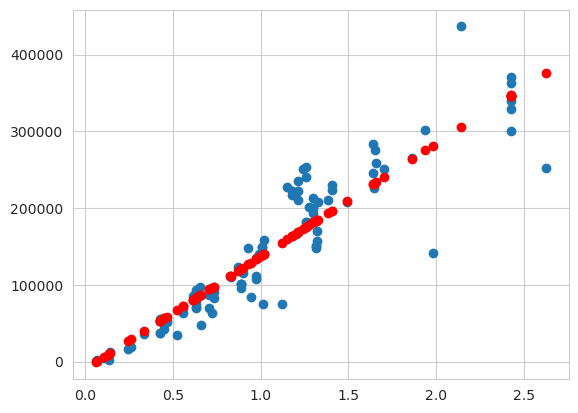

In [5]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = ['Area']

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0, shuffle=True, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

# Straight forward all features

0.38609734823150765
0.7459712085921818
5764256822.113226


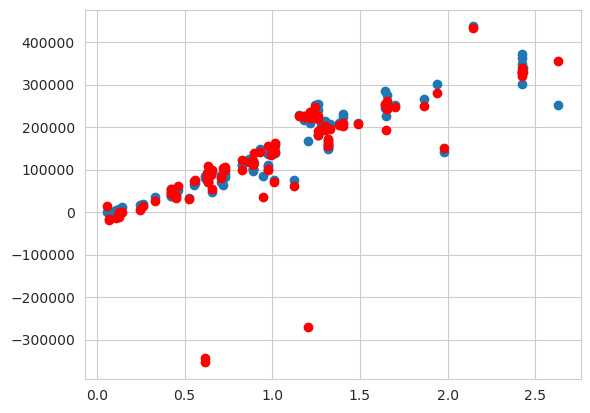

In [6]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features = ['Area', 'Cells_in_Series',
       'Parallel_Strings', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Aisc', 'Aimp',
       'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       'A', 'B', 'C4', 'C5', 'IXO', 'IXXO', 'C6', 'C7']

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=0, shuffle=True, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

# Including materials

In [7]:
dfd = pandas.concat([df, pandas.get_dummies(df['Material']).astype(int)], axis=1)


0.8289845552172508
0.42430797927323405
1605754497.7789636


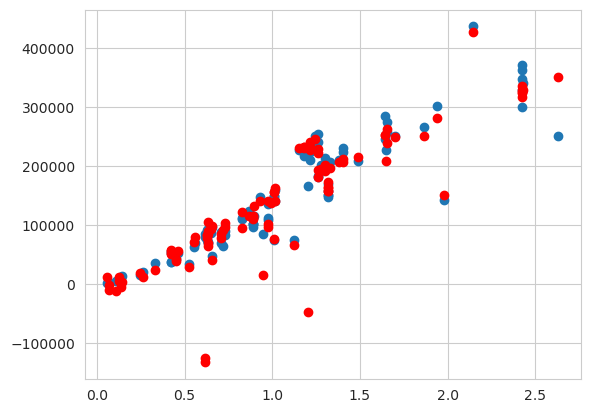

In [8]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


features = ['Area', 'Cells_in_Series',
       'Parallel_Strings', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Aisc', 'Aimp',
       'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       'A', 'B', 'C4', 'C5', 'IXO', 'IXXO', 'C6', 'C7']
material_features = list(df['Material'].value_counts().index)

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(dfd[features + material_features], dfd[target], random_state=0, shuffle=True, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

# Correlated features with materials

0.9569300838343685
0.29986883850893814
404406231.7867445


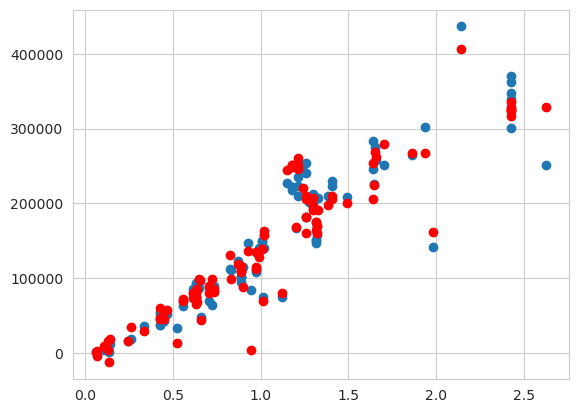

In [9]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


features = ['Area', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Cells_in_Series', 'IXO', 'IXXO', 'Bvoco', 'Bvmpo',]
#, 'Cells_in_Series', 'Parallel_Strings'
       #  , 'Aisc', 'Aimp',
       # 'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       # 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       # 'A', 'B', 'C4', 'C5',  'C6', 'C7'
material_features = list(df['Material'].value_counts().index)

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(dfd[features + material_features], dfd[target], random_state=0, shuffle=True, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

# Also including vintage feature

0.9593837056322293
0.3958879767439309
381367878.48030144


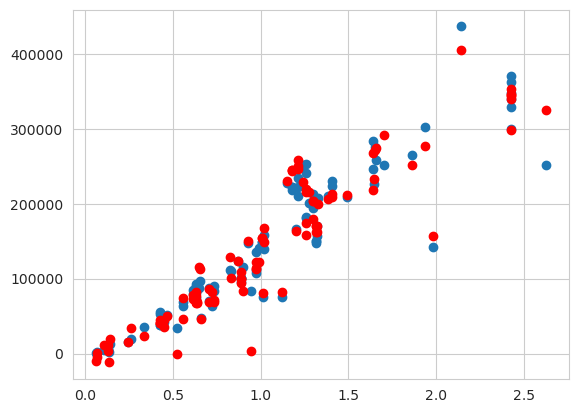

In [10]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dfd['Vintage'] = dfd['Vintage'].astype(str).apply(lambda x: x.replace('(E)', '').strip()).astype(int)

features = ['Area', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Cells_in_Series', 'IXO', 'IXXO', 'Bvoco', 'Bvmpo', 'Vintage']
#, 'Cells_in_Series', 'Parallel_Strings'
       #  , 'Aisc', 'Aimp',
       # 'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       # 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       # 'A', 'B', 'C4', 'C5',  'C6', 'C7'
material_features = list(df['Material'].value_counts().index)

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(dfd[features + material_features], dfd[target], random_state=0, shuffle=True, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

# Scaling

0.9569300838343691
0.2998688385089424
404406231.78673923


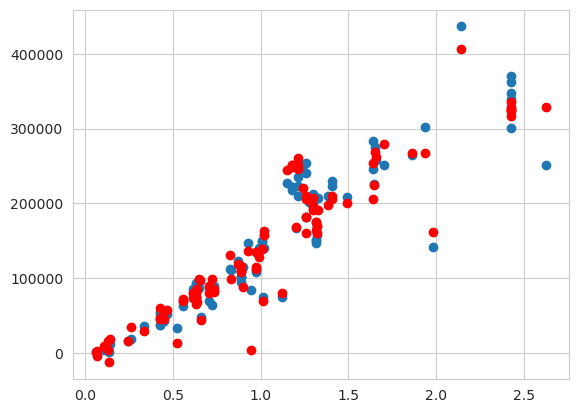

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


features = ['Area', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Cells_in_Series', 'IXO', 'IXXO', 'Bvoco', 'Bvmpo']
#, 'Cells_in_Series', 'Parallel_Strings'
       #  , 'Aisc', 'Aimp',
       # 'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       # 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       # 'A', 'B', 'C4', 'C5',  'C6', 'C7'
material_features = list(df['Material'].value_counts().index)

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(dfd[features + material_features], dfd[target], random_state=0, shuffle=True, test_size=0.2)


scaler = MinMaxScaler()
linear_regression = LinearRegression()
pipeline = Pipeline(
 [
     ("scaler", scaler),
     ("linear_regression", linear_regression),
 ]
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
    

# Including polynomials

0.9920183794199094
0.07299606823313498
74943658.81588718


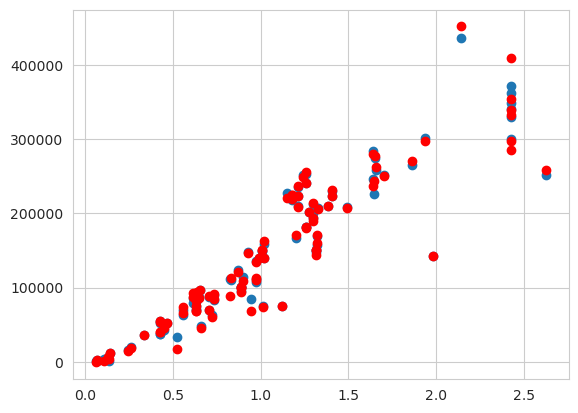

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


dfd['Vintage'] = dfd['Vintage'].astype(str).apply(lambda x: x.replace('(E)', '').strip()).astype(int)

features = ['Area', 'Isco', 'Voco', 'Impo', 'Vmpo', 'Cells_in_Series', 'IXO', 'IXXO', 'Bvoco', 'Bvmpo', 'Vintage']
#, 'Cells_in_Series', 'Parallel_Strings'
       #  , 'Aisc', 'Aimp',
       # 'C0', 'C1', 'Bvoco', 'Mbvoc', 'Bvmpo', 'Mbvmp', 'N', 'C2', 'C3', 'A0',
       # 'A1', 'A2', 'A3', 'A4', 'B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'DTC', 'FD',
       # 'A', 'B', 'C4', 'C5',  'C6', 'C7'
material_features = list(df['Material'].value_counts().index[1:])

target = 'annual_energy_yield'

X_train, X_test, y_train, y_test = train_test_split(dfd[features + material_features], dfd[target], random_state=0, shuffle=True, test_size=0.2)


scaler = MinMaxScaler()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
 [
       ("scaler", scaler),
       ("polynomial_features", polynomial_features),
       ("linear_regression", linear_regression),
 ]
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

plt.scatter(X_test['Area'], y_test)
plt.scatter(X_test['Area'], y_pred, color='red')

print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
    